### MANE 4962 HW 2
Lucas Zhou  RIN: 662005044

Problem 1:

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # all original features
y = iris.target

# Define new features
# Feature 1: Ratio of petal length to sepal length (Petal length / Sepal length)
# Feature 2: Product of sepal width and petal width (Sepal width * Petal width)
X_new = np.zeros((X.shape[0], 2))
X_new[:, 0] = X[:, 2] / X[:, 0]  # Petal length / Sepal length
X_new[:, 1] = X[:, 1] * X[:, 3]  # Sepal width * Petal width

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

# Training the SVM classifier
clf = svm.SVC()
clf.fit(X_train, y_train)

# Making predictions and calculating accuracy
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)

print('Accuracy score:', acc)

Accuracy score: 0.9166666666666666


Problem 2:

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-6-675fa7b022e5>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X, y = mnist['

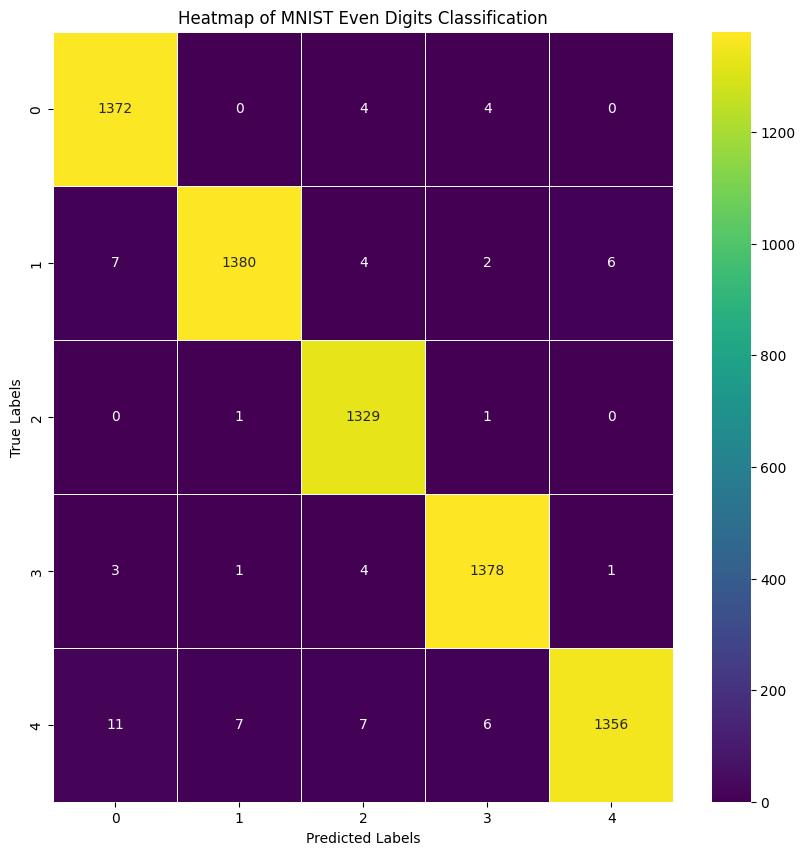

Number of 6's correctly classified: 1378


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Assuming y is a pandas Series after fetching the MNIST dataset
X, y = mnist['data'], mnist['target'].astype(np.int)
even_digit_indices = [i for i, digit in enumerate(y) if digit % 2 == 0]
X_even, y_even = X.iloc[even_digit_indices], y.iloc[even_digit_indices]


# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_even, y_even, test_size=0.2, random_state=42)

# Initialize the KNN classifier with 3 neighbors
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn_clf.fit(X_train, y_train)

# Predict the test data
y_pred = knn_clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
ax = sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, cmap='viridis')
plt.title('Heatmap of MNIST Even Digits Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Count the number of correctly classified 6's
sixes_correctly_classified = cm[3, 3]  # Index 3 corresponds to the digit '6' in the even numbers

print(f"Number of 6's correctly classified: {sixes_correctly_classified}")

Problem 3:

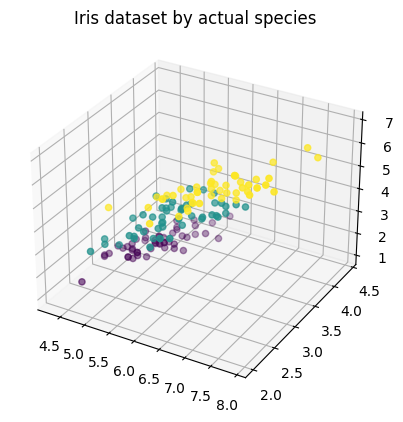

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


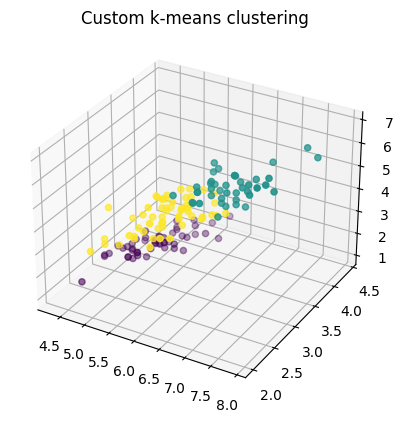

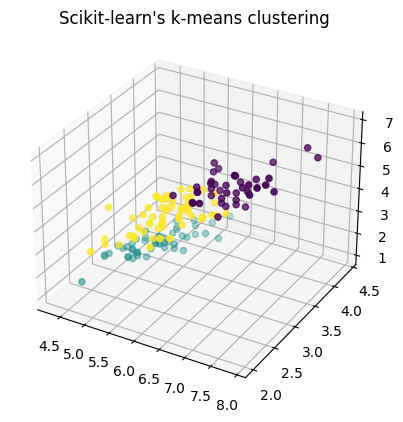

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :3]  # Selecting only the first three features

# K-Means Algorithm
def k_means(X, k, max_iters=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for i in range(max_iters):
        # Assign clusters
        clusters = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # Update centroids
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

# Visualizing the Iris dataset in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=iris.target)
ax.set_title('Iris dataset by actual species')
plt.show()

# Cluster with the custom k-means algorithm
k = 3  # Number of clusters
clusters_custom, centroids_custom = k_means(X, k)

# Cluster with scikit-learn's k-means
kmeans_sklearn = KMeans(n_clusters=k, random_state=42)
clusters_sklearn = kmeans_sklearn.fit_predict(X)

# Visualize clustering results from the custom method
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters_custom)
ax.set_title('Custom k-means clustering')
plt.show()

# Visualize clustering results from scikit-learn's method
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters_sklearn)
ax.set_title("Scikit-learn's k-means clustering")
plt.show()


## What happens when you vary the number of clusters?


*   k = 2 (decrease the number of cluster)

  When the number of clusters was set to two, both the custom implementation and scikit-learn's k-means algorithm merged two of the three Iris species into a single cluster.
*  k = 5 (increase the number of cluster)

  Increasing the number of clusters to five led to over-segmentation, where the algorithms artificially split natural groups into smaller, less meaningful subgroups.

